# 🏷️ Cluster Labeling, Skill Extraction & Visualization

This notebook performs the final analysis steps:
1. **Label clusters** using keyword mapping
2. **Extract skills & qualifications** from job descriptions
3. **Create comprehensive visualizations**
4. **Generate insights & dashboard**

---

In [27]:
# Import required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from modules.labeling import ClusterLabeler, label_clusters
from modules.extraction import SkillExtractor, extract_skills
from modules.visualization import (
    plot_cluster_distribution, 
    plot_cluster_scatter_2d,
    plot_cluster_keywords,
    plot_cluster_comparison,
    create_wordcloud
)

# Standard libraries
import plotly.express as px
import pickle

print("✅ Modules loaded successfully!")

✅ Modules loaded successfully!


## 1️⃣ Load Clustered Data

In [28]:
# Load clustered data from previous notebook
df = pd.read_csv('data_clustered.csv')

# Load vectorizer
with open('vectorizer.pkl', 'rb') as f:
    data = pickle.load(f)
    vectorizer_loaded = data['vectorizer']

# Recreate TF-IDF matrix
X = vectorizer_loaded.transform(df['title_cleaned'])

print(f"📊 Loaded {len(df)} job offers with {df['cluster'].nunique()} clusters")
print(f"   Matrix shape: {X.shape}")

📊 Loaded 5934 job offers with 30 clusters
   Matrix shape: (5934, 100)


## 2️⃣ Label Clusters

Apply keyword mapping to assign meaningful names to each cluster.

In [29]:
# Initialize labeler
labeler = ClusterLabeler()

# Label all clusters
df = labeler.label_all_clusters(df, text_column='title_cleaned', label_column='famille_poste')

print("\n✅ Cluster labeling complete!")

🏷️  Labeling 30 clusters...
   Cluster 0 (592 items): Business Intelligence / Data
   Cluster 1 (1820 items): Commercial / Vente
   Cluster 2 (94 items): Finance / Comptabilite
   Cluster 3 (266 items): Finance / Comptabilite
   Cluster 4 (147 items): Commercial / Vente
   Cluster 5 (430 items): Business Intelligence / Data
   Cluster 6 (217 items): Finance / Comptabilite
   Cluster 7 (462 items): Industriel / Technique
   Cluster 8 (37 items): Business Intelligence / Data
   Cluster 9 (183 items): Business Intelligence / Data
   Cluster 10 (44 items): Marketing / Digital
   Cluster 11 (63 items): Dessinateur
   Cluster 12 (115 items): Supply Chain / Logistique
   Cluster 13 (123 items): Industriel / Technique
   Cluster 14 (108 items): Informatique / Developpement
   Cluster 15 (192 items): Informatique / Developpement
   Cluster 16 (202 items): Informatique / Developpement
   Cluster 17 (90 items): Chauffeur
   Cluster 18 (65 items): Rh / Management
   Cluster 19 (52 items): Business

In [30]:
# Display cluster summary
summary = labeler.get_cluster_summary(df, text_column='title_cleaned')
print("\n📊 Cluster Summary:\n")
print(summary.to_string(index=False))


📊 Cluster Summary:

 cluster_id  size  percentage                                                 top_keywords                        label
          1  1820   30.670711             business, support, confirme, developer, bilingue           Commercial / Vente
          0   592    9.976407                                           charge, commercial Business Intelligence / Data
          7   462    7.785642 responsable, commercial, production, logistique, maintenance       Industriel / Technique
          5   430    7.246377                                        assistant, commercial Business Intelligence / Data
          3   266    4.482642                    projet, chef, digital, comptable, dagence       Finance / Comptabilite
          6   217    3.656892                    comptable, senior, reviseur, expert, jior       Finance / Comptabilite
         16   202    3.404112                       developpeur, fullstack, end, web, java Informatique / Developpement
         15   192  

In [31]:
# Visualize labeled clusters distribution
fig = plot_cluster_distribution(df, label_column='famille_poste', 
                                title='Job Offers by Category')
fig.show()

## 3️⃣ Explore Individual Clusters

In [32]:
# Display sample jobs from each labeled category
for label in df['famille_poste'].unique()[:8]:  # First 8 categories
    cluster_jobs = df[df['famille_poste'] == label]['title_cleaned'].head(5)
    print(f"\n🏷️  {label} ({len(df[df['famille_poste'] == label])} jobs):")
    print(cluster_jobs.to_string(index=False))


🏷️  Commercial / Vente (1967 jobs):
work force management rh
work force management rh
work force management rh
               webmaster
         webmarketer seo

🏷️  Business Intelligence / Data (1615 jobs):
wordpress graphiste commity manager notion ia
                          technico commercial
                          technico commercial
                          technico commercial
                          technico commercial

🏷️  Informatique / Developpement (552 jobs):
webmaster designer developpeur dapplication web
               web developpeur react nativeexpo
                            web developpeur php
                                web developpeur
                                   travel agent

🏷️  Supply Chain / Logistique (115 jobs):
               webmarketing manager
               webmarketing manager
            trafic manager emailing
traffic manager franco hispanophone
traffic manager franco germanophone



🏷️  Finance / Comptabilite (660 jobs):
technicienne comptable bilinguecomptable
          technicien superviseur filaire
                       support comptable
                    superviseur tournant
                     superviseur textile

🏷️  Industriel / Technique (585 jobs):
                             technicien topographe
                             technicien topographe
technicien testeur service performance reseau m...
                technicien support python bilingue
         technicien support premiere seconde ligne

🏷️  Marketing / Digital (44 jobs):
stratege marketing numerique
       responsable marketing
       responsable marketing
       responsable marketing
       responsable marketing

🏷️  Rh / Management (209 jobs):
              stagiaire ressources humaines
              stagiaire ressources humaines
              stagiaire ressources humaines
              stagiaire ressources humaines
stagiaire developpement ressources humaines


In [33]:
# Keywords for specific clusters
print("\n📌 Top Keywords per Cluster:\n")

for cluster_id in range(min(5, df['cluster'].nunique())):
    keywords = labeler.get_cluster_keywords(df, cluster_id, top_n=10)
    label = df[df['cluster'] == cluster_id]['famille_poste'].iloc[0]
    
    print(f"\n{label} (Cluster {cluster_id}):")
    print(", ".join([f"{word} ({count})" for word, count in keywords[:10]]))


📌 Top Keywords per Cluster:


Business Intelligence / Data (Cluster 0):
charge (592), commercial (592)

Commercial / Vente (Cluster 1):
business (65), support (54), confirme (53), developer (52), bilingue (50), commercial (48), client (48), conseiller (45), coordinateur (43), full (42)

Finance / Comptabilite (Cluster 2):
superviseur (94), comptable (18), call (14), credit (8), commercial (5), operations (3), jour (3), nuit (3), production (3), sup (3)

Finance / Comptabilite (Cluster 3):
projet (344), chef (265), digital (243), comptable (38), dagence (13), digitals (11), marketing (11), dequipe (11), produit (10), production (10)

Commercial / Vente (Cluster 4):
tele (143), propsecteur (138), clientele (4), propsecteurtravail (4), agents (2), propsecteurvente (2), supports (1), debutants (1), stagiaires (1), propsecteurprospecteurs (1)


In [34]:
# Visualize keywords for a specific cluster
cluster_to_visualize = 0  # Change this to explore different clusters

fig = plot_cluster_keywords(df, cluster_to_visualize, top_n=15)
fig.show()

## 4️⃣ Extract Skills & Qualifications

Extract technical skills, soft skills, and qualifications from job descriptions.

In [35]:
# Initialize skill extractor
extractor = SkillExtractor()

# Extract skills from all jobs
df = extractor.extract_all_from_dataframe(
    df, 
    text_column='mission_cleaned',  # Job description
    title_column='title_cleaned'     # Job title
)

print("\n✅ Skill extraction complete!")

🔍 Extracting skills from 5934 job offers...
✅ Skill extraction complete!
   Technical skills found: 6028
   Soft skills found: 3224

✅ Skill extraction complete!


In [36]:
# Display sample with extracted skills
sample_cols = ['title_cleaned', 'famille_poste', 'technical_skills', 'soft_skills', 
               'years_experience', 'education_level']
print("\n📋 Sample Jobs with Extracted Skills:\n")
print(df[sample_cols].head(10).to_string(index=False))


📋 Sample Jobs with Extracted Skills:

                                  title_cleaned                famille_poste                                              technical_skills            soft_skills  years_experience education_level
                       work force management rh           Commercial / Vente                                                         audit communication, analyse               NaN             NaN
                       work force management rh           Commercial / Vente                                                         audit communication, analyse               NaN             NaN
                       work force management rh           Commercial / Vente                                                         audit communication, analyse               NaN             NaN
  wordpress graphiste commity manager notion ia Business Intelligence / Data                                                seo, wordpress                                      N

## 5️⃣ Skill Frequency Analysis

In [37]:
# Top technical skills across all jobs
tech_skills_freq = extractor.get_skill_frequency(df, skill_type='technical')

print("\n💻 Top 20 Technical Skills:\n")
print(tech_skills_freq.head(20).to_string(index=False))


💻 Top 20 Technical Skills:

       skill  frequency  percentage
         sem       1275   21.486350
          go       1024   17.256488
      budget        456    7.684530
     tableau        391    6.589147
comptabilite        358    6.033030
       audit        324    5.460061
       excel        200    3.370408
         vue        196    3.303000
  tresorerie        180    3.033367
         erp        179    3.016515
         seo        124    2.089653
       react        120    2.022245
         crm        111    1.870576
         sql        108    1.820020
        java         82    1.381867
    linkedin         77    1.297607
         sap         61    1.027974
         php         57    0.960566
   wordpress         54    0.910010
      python         54    0.910010


In [38]:
# Visualize top technical skills
fig = px.bar(tech_skills_freq.head(20),
            x='frequency',
            y='skill',
            orientation='h',
            title='Top 20 Technical Skills in Madagascar Job Market',
            labels={'frequency': 'Number of Job Offers', 'skill': 'Technical Skill'},
            text='percentage')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(height=600, yaxis={'categoryorder': 'total ascending'})
fig.show()

In [39]:
# Top soft skills
soft_skills_freq = extractor.get_skill_frequency(df, skill_type='soft')

print("\n🤝 Top 15 Soft Skills:\n")
print(soft_skills_freq.head(15).to_string(index=False))


🤝 Top 15 Soft Skills:

         skill  frequency  percentage
       analyse       1466   24.705089
 communication        729   12.285137
  organisation        496    8.358611
   negociation        196    3.303000
   relationnel         77    1.297607
       rigueur         66    1.112235
    motivation         56    0.943714
     autonomie         40    0.674082
    creativite         27    0.455005
    leadership         27    0.455005
travail equipe         16    0.269633
     dynamisme         10    0.168520
   proactivite          7    0.117964
  adaptabilite          5    0.084260
 gestion temps          5    0.084260


In [40]:
# Visualize soft skills
fig = px.bar(soft_skills_freq.head(15),
            x='frequency',
            y='skill',
            orientation='h',
            title='Top 15 Soft Skills Required',
            labels={'frequency': 'Number of Job Offers', 'skill': 'Soft Skill'},
            color='frequency',
            color_continuous_scale='viridis')

fig.update_layout(height=500, yaxis={'categoryorder': 'total ascending'})
fig.show()

## 6️⃣ Cluster-Specific Skill Analysis

In [41]:
# Skills by cluster category
for cluster_id in range(min(5, df['cluster'].nunique())):
    label = df[df['cluster'] == cluster_id]['famille_poste'].iloc[0]
    
    cluster_skills = extractor.get_cluster_skills(df, cluster_id, skill_type='technical', top_n=10)
    
    print(f"\n🔹 {label} - Top Technical Skills:")
    print(cluster_skills.to_string(index=False))


🔹 Business Intelligence / Data - Top Technical Skills:
       skill  count
          go    170
         sem     85
     tableau     38
      budget     33
       audit     22
comptabilite     21
       excel     21
         crm     18
         sap     15
    linkedin     12

🔹 Commercial / Vente - Top Technical Skills:
       skill  count
         sem    335
          go    327
       audit    104
      budget     84
         erp     83
comptabilite     81
     tableau     79
       excel     64
         vue     53
  tresorerie     50

🔹 Finance / Comptabilite - Top Technical Skills:
  skill  count
    sem     21
  audit      4
     go      4
 budget      3
    vue      3
  react      3
tableau      2
    sap      1
  excel      1

🔹 Finance / Comptabilite - Top Technical Skills:
       skill  count
         sem     72
      budget     53
          go     50
comptabilite     23
       audit     19
     tableau     18
         vue     13
         seo     13
         erp     10
  tresor

In [42]:
# Experience requirements by category
exp_by_category = df.groupby('famille_poste')['years_experience'].agg(['mean', 'median', 'count'])
exp_by_category = exp_by_category[exp_by_category['count'] >= 5].sort_values('mean', ascending=False)

print("\n📊 Years of Experience by Job Category:\n")
print(exp_by_category.to_string())


📊 Years of Experience by Job Category:

                                  mean  median  count
famille_poste                                        
Informatique / Developpement  2.500000     1.0      8
Commercial / Vente            2.107143     1.0     28


In [43]:
# Education level distribution
education_dist = df['education_level'].value_counts()

fig = px.pie(values=education_dist.values, 
            names=education_dist.index,
            title='Education Level Requirements',
            hole=0.4)
fig.show()

## 7️⃣ Comprehensive Visualizations

In [44]:
# Multi-cluster keyword comparison
fig = plot_cluster_comparison(df, text_column='title_cleaned', 
                              top_n_clusters=6, keywords_per_cluster=8)
fig.show()

In [45]:
# 2D cluster visualization with labels
fig = plot_cluster_scatter_2d(
    df, 
    X,
    label_column='famille_poste',
    method='pca',
    hover_data=['title_cleaned', 'technical_skills', 'years_experience']
)
fig.show()

🎨 Creating 2D visualization using PCA...
✅ Visualization created!


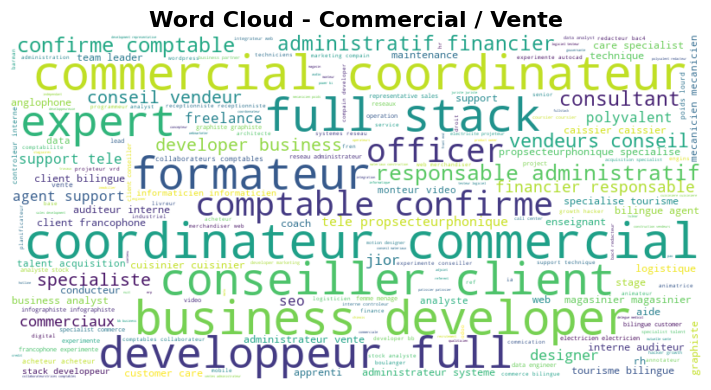

In [46]:
# Word cloud for largest cluster
largest_cluster = df['cluster'].value_counts().index[0]
fig_wc = create_wordcloud(df, cluster_id=largest_cluster)
fig_wc.show()

## 8️⃣ Generate Insights Dashboard

In [47]:
# Key metrics
total_jobs = len(df)
total_categories = df['famille_poste'].nunique()
avg_skills_per_job = df['technical_skills_count'].mean()
jobs_with_exp = (df['years_experience'].notna()).sum()

print("\n" + "="*60)
print("📊 JOB MARKET ANALYSIS - MADAGASCAR")
print("="*60)
print(f"\n📈 Key Metrics:")
print(f"   • Total Job Offers Analyzed: {total_jobs:,}")
print(f"   • Job Categories Identified: {total_categories}")
print(f"   • Avg Technical Skills per Job: {avg_skills_per_job:.1f}")
print(f"   • Jobs with Experience Requirement: {jobs_with_exp} ({jobs_with_exp/total_jobs*100:.1f}%)")


📊 JOB MARKET ANALYSIS - MADAGASCAR

📈 Key Metrics:
   • Total Job Offers Analyzed: 5,934
   • Job Categories Identified: 11
   • Avg Technical Skills per Job: 1.0
   • Jobs with Experience Requirement: 38 (0.6%)


In [48]:
# Top categories
print(f"\n🏆 Top 5 Job Categories:")
top_categories = df['famille_poste'].value_counts().head(5)
for idx, (category, count) in enumerate(top_categories.items(), 1):
    print(f"   {idx}. {category}: {count} jobs ({count/total_jobs*100:.1f}%)")


🏆 Top 5 Job Categories:
   1. Commercial / Vente: 1967 jobs (33.1%)
   2. Business Intelligence / Data: 1615 jobs (27.2%)
   3. Finance / Comptabilite: 660 jobs (11.1%)
   4. Industriel / Technique: 585 jobs (9.9%)
   5. Informatique / Developpement: 552 jobs (9.3%)


In [49]:
# Most demanded skills
print(f"\n💼 Top 10 Most Demanded Skills:")
top_skills = tech_skills_freq.head(10)
for idx, row in top_skills.iterrows():
    print(f"   • {row['skill']}: {row['frequency']} jobs ({row['percentage']:.1f}%)")


💼 Top 10 Most Demanded Skills:
   • sem: 1275 jobs (21.5%)
   • go: 1024 jobs (17.3%)
   • budget: 456 jobs (7.7%)
   • tableau: 391 jobs (6.6%)
   • comptabilite: 358 jobs (6.0%)
   • audit: 324 jobs (5.5%)
   • excel: 200 jobs (3.4%)
   • vue: 196 jobs (3.3%)
   • tresorerie: 180 jobs (3.0%)
   • erp: 179 jobs (3.0%)


In [50]:
# Create summary statistics table
summary_stats = pd.DataFrame({
    'Category': df['famille_poste'].value_counts().index[:10],
    'Job Count': df['famille_poste'].value_counts().values[:10],
    'Avg Technical Skills': [df[df['famille_poste'] == cat]['technical_skills_count'].mean() 
                            for cat in df['famille_poste'].value_counts().index[:10]],
    'Avg Years Exp': [df[df['famille_poste'] == cat]['years_experience'].mean() 
                     for cat in df['famille_poste'].value_counts().index[:10]]
})

summary_stats['Percentage'] = (summary_stats['Job Count'] / total_jobs * 100).round(1)

print("\n📋 Category Summary:\n")
print(summary_stats.to_string(index=False))


📋 Category Summary:

                    Category  Job Count  Avg Technical Skills  Avg Years Exp  Percentage
          Commercial / Vente       1967              0.913066       2.107143        33.1
Business Intelligence / Data       1615              0.902167      10.000000        27.2
      Finance / Comptabilite        660              1.248485            NaN        11.1
      Industriel / Technique        585              1.018803            NaN         9.9
Informatique / Developpement        552              1.472826       2.500000         9.3
             Rh / Management        209              1.334928            NaN         3.5
   Supply Chain / Logistique        115              1.113043            NaN         1.9
                   Chauffeur         90              0.144444            NaN         1.5
                 Dessinateur         63              0.682540            NaN         1.1
         Marketing / Digital         44              1.250000            NaN         0.7

## 9️⃣ Save Final Results

In [51]:
# Save final dataset with all features
output_file = 'data_final_with_skills.csv'
df.to_csv(output_file, index=False)

print(f"💾 Final dataset saved to: {output_file}")
print(f"\n   Total rows: {len(df)}")
print(f"   Total columns: {len(df.columns)}")
print(f"   Columns: {list(df.columns)}")

💾 Final dataset saved to: data_final_with_skills.csv

   Total rows: 5934
   Total columns: 16
   Columns: ['mission_clean', 'profil_clean', 'title_clean', 'title_cleaned', 'mission_cleaned', 'profil_cleaned', 'cluster', 'famille_poste', 'technical_skills', 'soft_skills', 'qualifications', 'technical_skills_count', 'soft_skills_count', 'years_experience', 'education_level', 'languages']


In [52]:
# Export summary report
summary_report = {
    'total_jobs': total_jobs,
    'total_categories': total_categories,
    'categories': top_categories.to_dict(),
    'top_technical_skills': tech_skills_freq.head(15).to_dict('records'),
    'top_soft_skills': soft_skills_freq.head(10).to_dict('records'),
    'education_distribution': education_dist.to_dict(),
    'avg_technical_skills_per_job': avg_skills_per_job
}

import json
with open('analysis_summary.json', 'w', encoding='utf-8') as f:
    json.dump(summary_report, f, indent=2, ensure_ascii=False)

print("💾 Summary report saved to: analysis_summary.json")

💾 Summary report saved to: analysis_summary.json


## ✅ Analysis Complete!

**Comprehensive Job Market Analysis Finished!**

✅ **Completed Steps:**
1. Labeled all clusters with meaningful categories
2. Extracted technical skills, soft skills, and qualifications
3. Analyzed skill frequency across job market
4. Created comprehensive visualizations
5. Generated insights dashboard
6. Saved final dataset and summary report

**Outputs:**
- `data_final_with_skills.csv` - Complete dataset with all features
- `analysis_summary.json` - Summary report with key metrics
- Interactive visualizations for exploration

**Key Findings:**
- Identified {total_categories} distinct job categories
- Analyzed {total_jobs:,} job offers
- Extracted skill requirements and qualifications
- Mapped Madagascar job market landscape

🎉 **Your job market analysis pipeline is now complete!**